### Import des données et librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
df_elec=pd.read_csv('./electricity_market_dataset.csv')
df_elec

,Timestamp,Historical_Electricity_Prices,Projected_Electricity_Prices,Inflation_Rates,GDP_Growth_Rate,Energy_Market_Demand,Renewable_Investment_Costs,Fossil_Fuel_Costs,Electricity_Export_Prices,Market_Elasticity,...,Regulatory_Policies,Energy_Access_Data,LCOE,ROI,Net_Present_Value,Population_Growth,Optimal_Energy_Mix,Electricity_Price_Forecast,Project_Risk_Analysis,Investment_Feasibility
0,2018-01-01 00:00:00,49.996032,55.031818,1.392434,1.986952,1999.968412,99.949107,80.101098,39.978725,0.462419,...,Low,Urban,59.953174,10.025100,1000.024510,1.097754,49.954608,100.022582,Low,0.836012
1,2018-01-01 01:00:00,49.978213,55.070912,1.501643,2.023109,2000.015836,99.974557,80.095713,40.033188,0.433015,...,Low,Rural,60.014555,9.979857,1000.009975,1.006117,50.031815,100.039341,Low,0.756744
2,2018-01-01 02:00:00,50.103323,55.056331,1.491147,2.026511,2000.065782,100.058160,79.969953,40.046224,0.555429,...,Low,Rural,59.886781,10.042848,1000.208902,1.014115,50.019036,99.964540,High,0.801846
3,2018-01-01 03:00:00,49.987191,54.998744,1.493230,1.971099,2000.136293,99.926106,79.964259,39.960201,0.548170,...,Low,Rural,60.042484,9.981117,1000.220672,0.973370,49.935259,100.035989,Low,0.806195
4,2018-01-01 04:00:00,49.992114,54.899707,1.513781,1.975598,2000.175635,100.020654,80.009550,39.998092,0.547575,...,Medium,Urban,60.017664,10.019175,1000.267051,0.922369,50.064588,100.083378,Low,0.821400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61363,2024-12-31 19:00:00,120.069233,129.987817,3.469842,3.896050,4999.737632,59.954784,100.013506,69.974147,0.875832,...,High,Rural,40.041786,19.984494,4999.828657,1.087097,69.990044,149.962055,High,1.464593
61364,2024-12-31 20:00:00,120.023009,130.047080,3.510843,4.003777,4999.882916,59.998277,100.047811,70.011965,0.888517,...,High,Rural,39.954721,20.053454,4999.714436,1.081167,70.057219,150.056218,Medium,1.493853
61365,2024-12-31 21:00:00,120.091890,129.933155,3.506173,4.034324,4999.812366,59.963870,100.046371,70.061104,0.867276,...,Medium,Urban,40.040729,19.910718,4999.933266,1.012415,70.027154,150.027160,High,1.578166
61366,2024-12-31 22:00:00,119.954642,130.030888,3.473001,4.026317,4999.890922,60.025985,99.972077,70.050249,0.945275,...,Low,Urban,39.935510,19.978242,4999.943659,1.051053,70.048111,149.944944,Medium,1.462779


## Revue des données

In [13]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61368 entries, 0 to 61367
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      61368 non-null  object 
 1   Historical_Electricity_Prices  61368 non-null  float64
 2   Projected_Electricity_Prices   61368 non-null  float64
 3   Inflation_Rates                61368 non-null  float64
 4   GDP_Growth_Rate                61368 non-null  float64
 5   Energy_Market_Demand           61368 non-null  float64
 6   Renewable_Investment_Costs     61368 non-null  float64
 7   Fossil_Fuel_Costs              61368 non-null  float64
 8   Electricity_Export_Prices      61368 non-null  float64
 9   Market_Elasticity              61368 non-null  float64
 10  Subsidies                      61368 non-null  float64
 11  Energy_Production_By_Solar     61368 non-null  float64
 12  Energy_Production_By_Wind      61368 non-null 

In [14]:
df_elec.describe()

,Historical_Electricity_Prices,Projected_Electricity_Prices,Inflation_Rates,GDP_Growth_Rate,Energy_Market_Demand,Renewable_Investment_Costs,Fossil_Fuel_Costs,Electricity_Export_Prices,Market_Elasticity,Subsidies,...,Energy_Storage_Capacity,GHG_Emissions,Renewable_Penetration_Rate,LCOE,ROI,Net_Present_Value,Population_Growth,Optimal_Energy_Mix,Electricity_Price_Forecast,Investment_Feasibility
count,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,...,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000
mean,85.000133,92.499865,2.499793,3.000193,3500.000178,80.000245,89.999970,55.000209,0.699947,9.999953,...,499.999709,400.000031,34.999616,49.999974,15.000232,2999.999528,1.029878,59.999764,124.999636,1.149706
std,20.207781,21.651668,0.579781,0.579561,866.046568,11.547427,5.773346,8.660411,0.125991,2.887450,...,173.209643,57.736405,8.660404,5.774092,2.887143,1154.729006,0.051432,5.773664,14.433939,0.208097
min,49.961967,54.899707,1.371817,1.840816,1999.968412,59.902353,79.912799,39.906512,0.331843,4.880353,...,199.923389,299.907257,19.916594,39.866893,9.827416,1000.009975,0.787569,49.831351,99.902578,0.636332
25%,67.498299,73.756672,1.999238,2.500159,2750.034414,70.002076,85.006844,47.492678,0.599755,7.499709,...,349.990197,349.994757,27.494940,44.996564,12.503373,1999.981113,0.994916,55.003158,112.500990,0.974866
50%,85.004525,92.499198,2.500932,3.000710,3499.986313,79.995556,90.000237,54.991897,0.700034,10.003353,...,500.024111,399.998383,34.998461,50.002322,15.000669,3000.000295,1.029783,59.997292,124.998010,1.149406
75%,102.504051,111.254199,3.000532,3.500458,4250.039623,89.996144,94.996444,62.501004,0.799812,12.503391,...,649.995991,449.989600,42.499383,54.994686,17.498372,3999.940143,1.064242,65.002729,137.497524,1.324851
max,120.098280,130.099068,3.651361,4.161202,5000.017293,100.119245,100.090504,70.143488,1.059527,15.147859,...,799.997144,500.080877,50.083318,60.116008,20.189480,4999.960646,1.233942,70.193535,150.114096,1.658918


On remarque qu'il y a plusieurs types de données. d'une part les données catégorielles et les données numériques d'autres parts au sein des données numériques certains représentent des montants tandis que d'autres représentent des taux. L'impact des ces 2 types de données ne seront pas les mêmes.



In [15]:
df_elec.columns
for feat in df_elec.columns:
    print(f'description de {df_elec[feat].name}:\n {df_elec[feat].describe()}\n\n')

description de Timestamp:
 count                   61368
unique                  61368
top       2018-01-01 00:00:00
freq                        1
Name: Timestamp, dtype: object


description de Historical_Electricity_Prices:
 count    61368.000000
mean        85.000133
std         20.207781
min         49.961967
25%         67.498299
50%         85.004525
75%        102.504051
max        120.098280
Name: Historical_Electricity_Prices, dtype: float64


description de Projected_Electricity_Prices:
 count    61368.000000
mean        92.499865
std         21.651668
min         54.899707
25%         73.756672
50%         92.499198
75%        111.254199
max        130.099068
Name: Projected_Electricity_Prices, dtype: float64


description de Inflation_Rates:
 count    61368.000000
mean         2.499793
std          0.579781
min          1.371817
25%          1.999238
50%          2.500932
75%          3.000532
max          3.651361
Name: Inflation_Rates, dtype: float64


description de GDP_

### Les données numériques

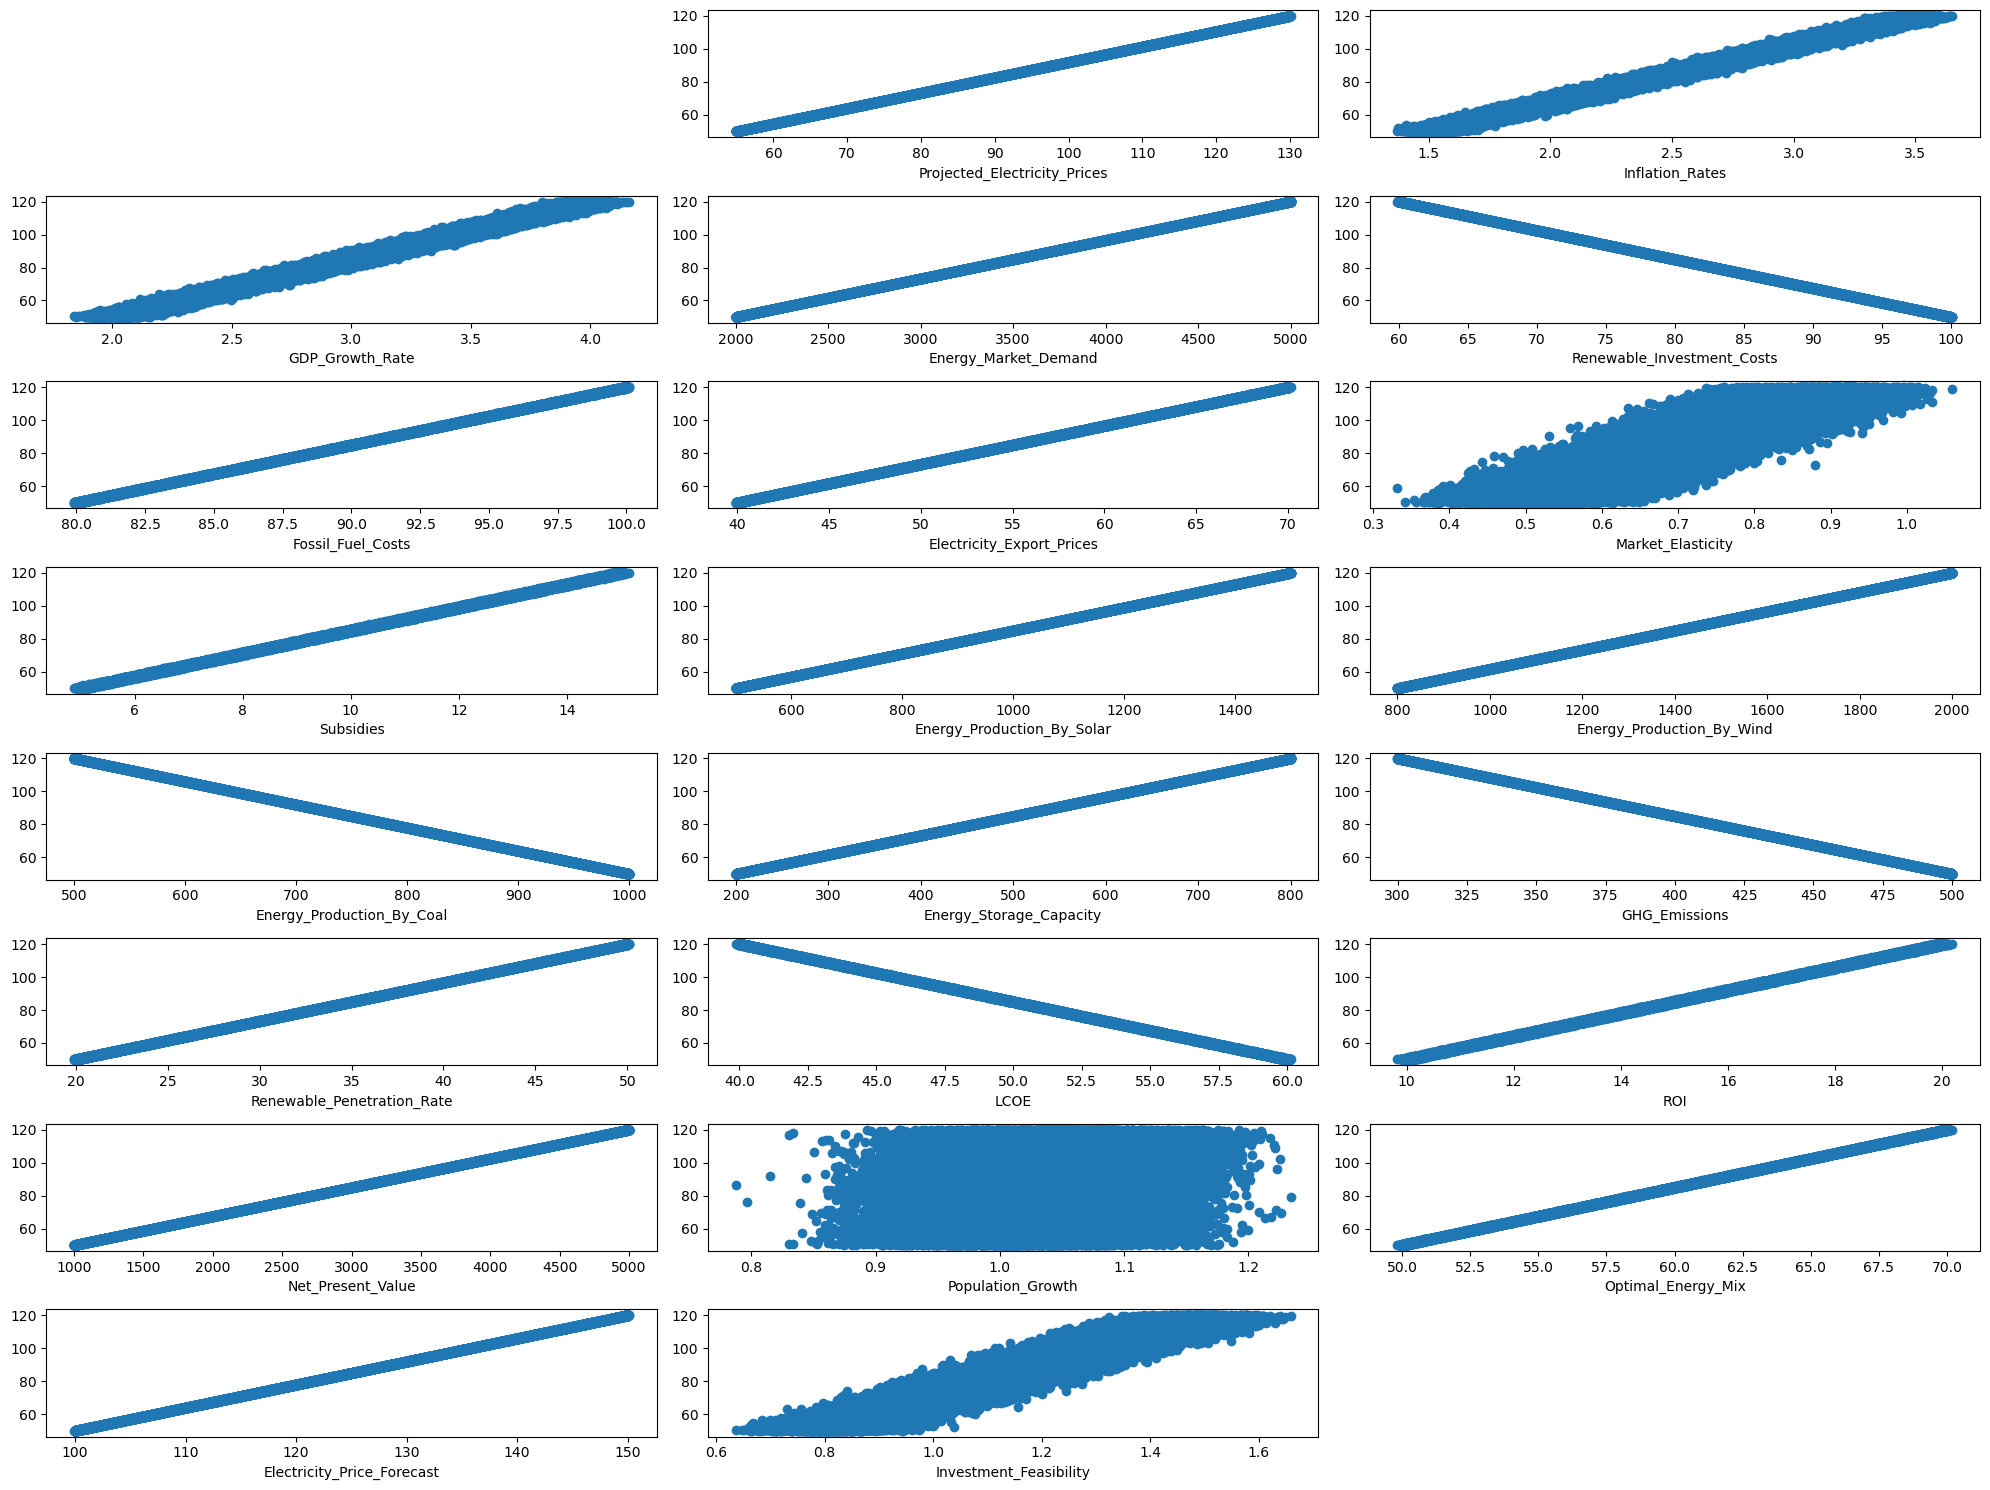

In [16]:
numeric_column=df_elec.select_dtypes('float64').columns
target='Historical_Electricity_Prices'
plt.figure(figsize=(20,15))
for i,col in enumerate( numeric_column):
    
    if col == target:
        continue
    plt.subplot(8,3,i+1)
    plt.scatter(df_elec[col],df_elec[target])
    plt.xlabel(col)
    # plt.ylabel(target)
plt.tight_layout()
plt.show()


Hormis la croissance de la population, toutes les features ont un corrélation linéaire avec la valeur cible.
On remarque cependant, que cette corélation est plus dispersé sur les features 'élasticité des marchés', 'la croisance du PBI' et 'le taux d'inflation'

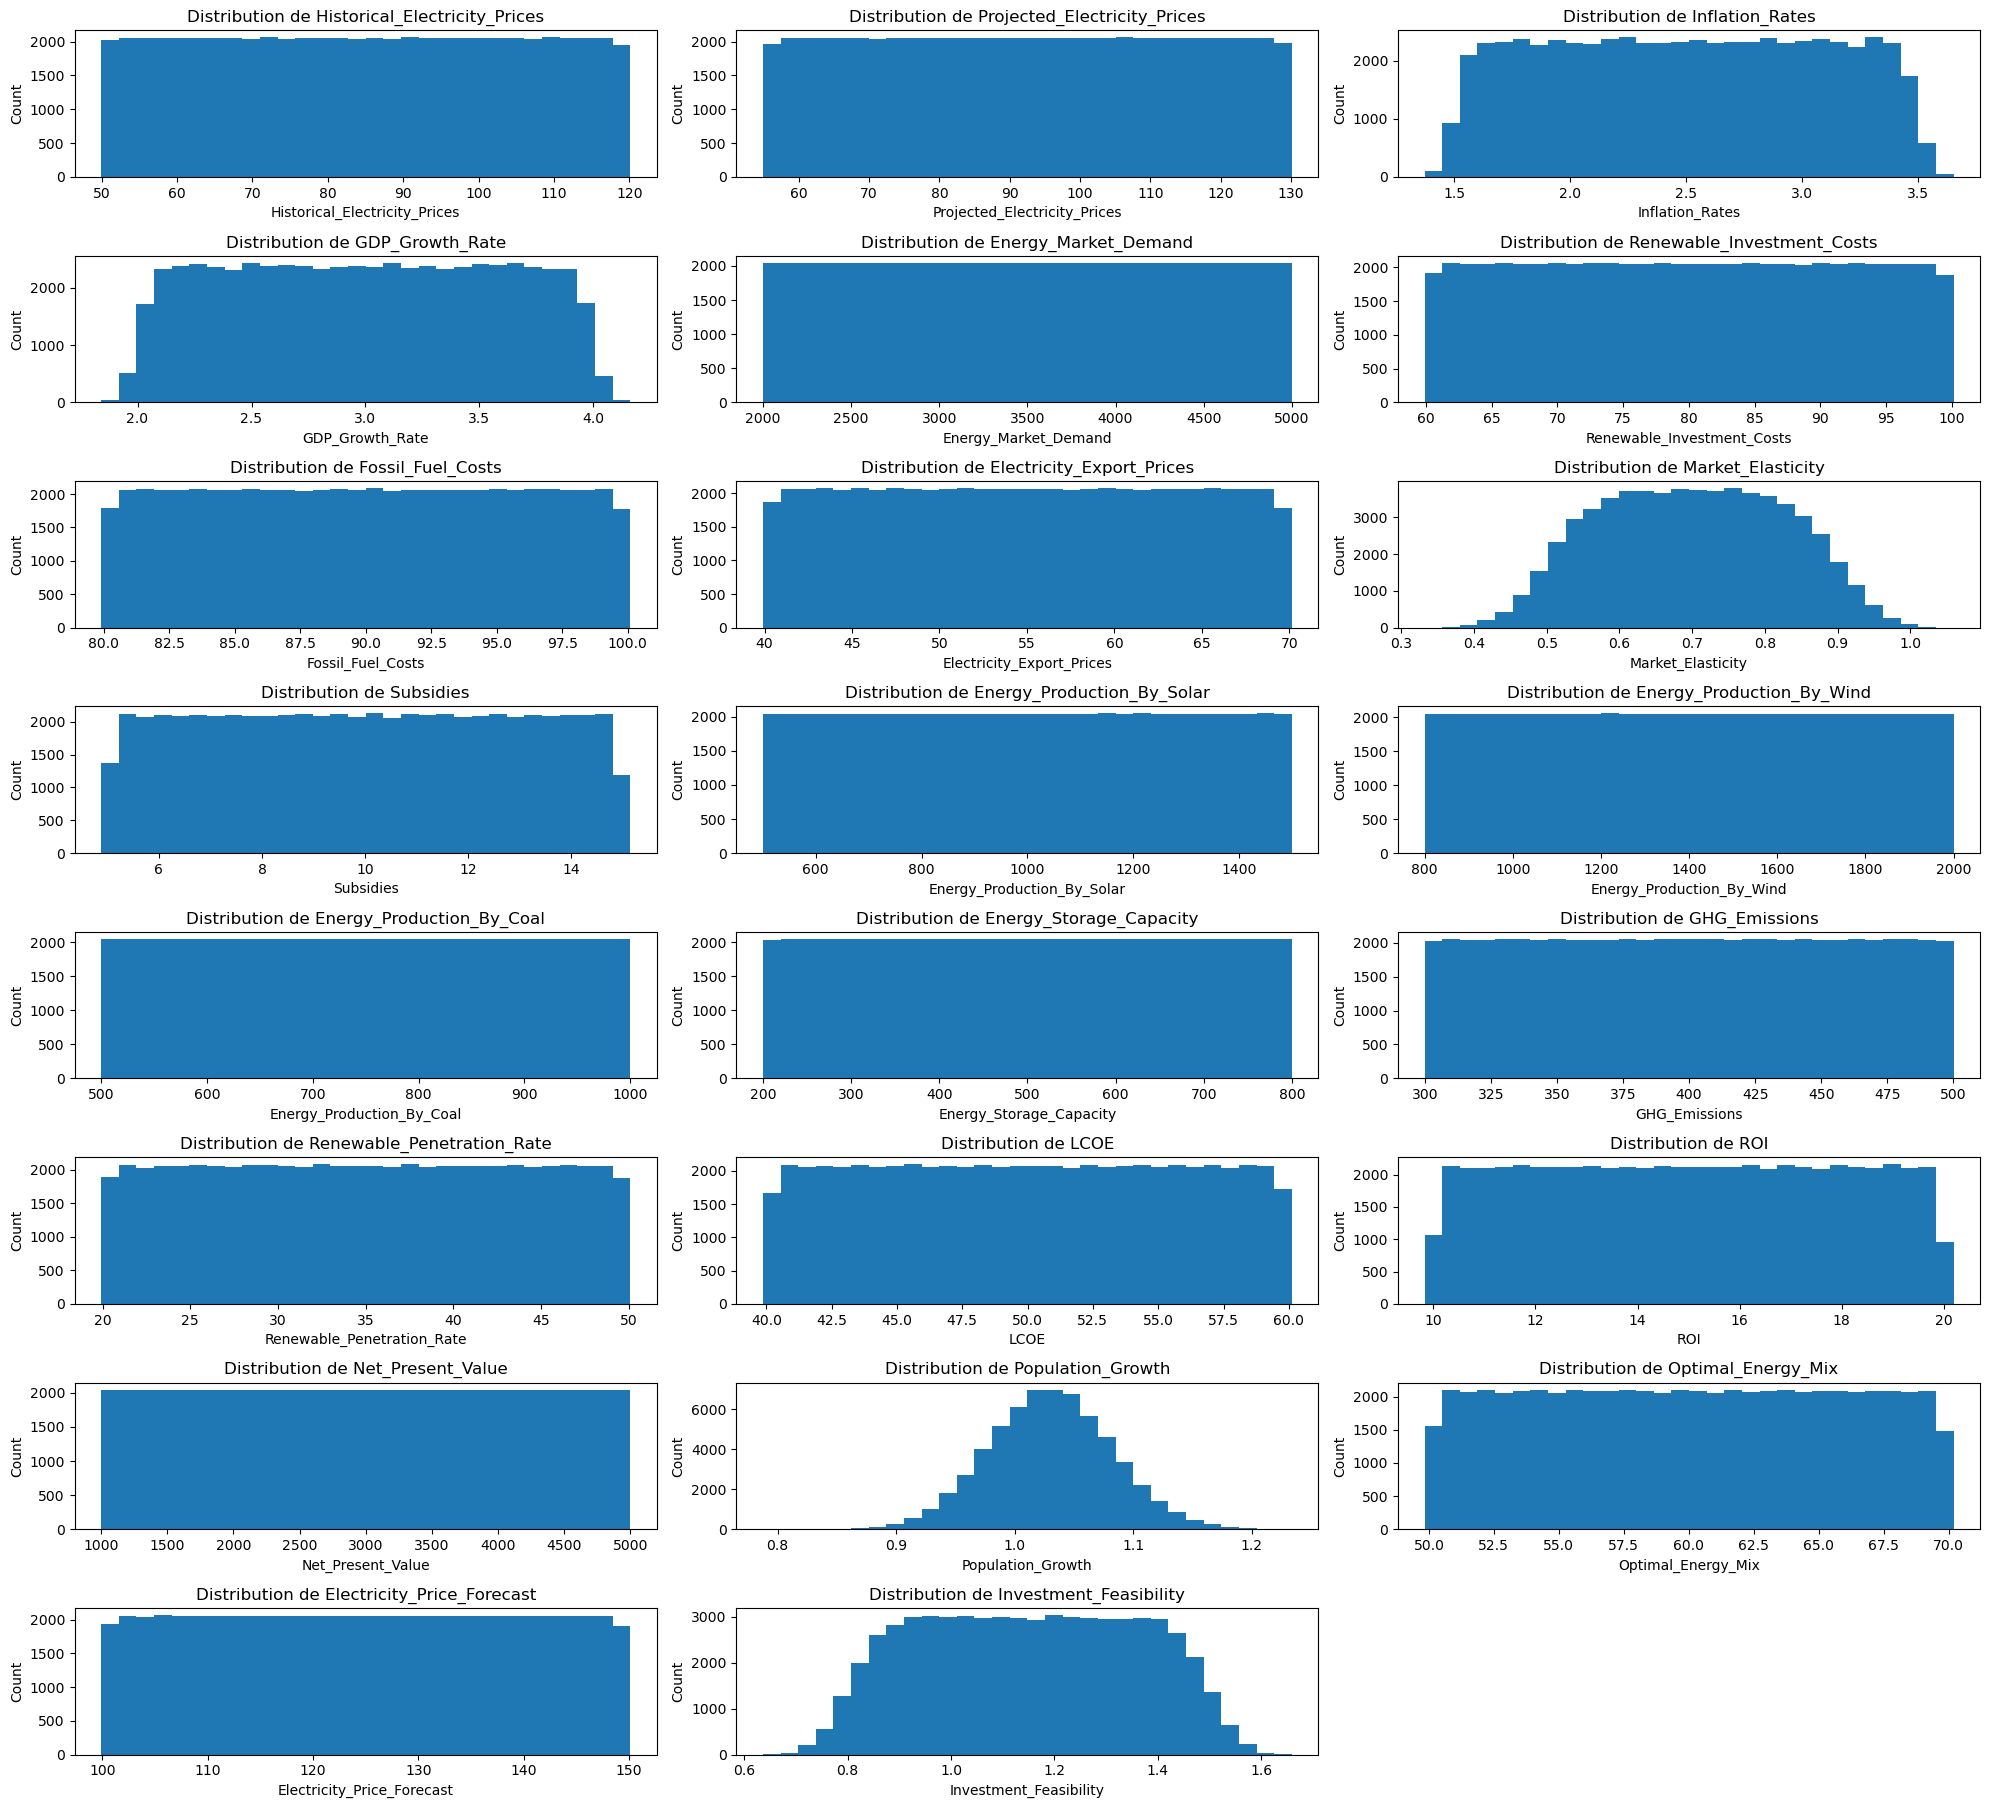

In [17]:
plt.figure(figsize=(20,20))
for i,col in enumerate(numeric_column):
    plt.subplot(9,3,i+1)
    plt.hist(df_elec[col].dropna(), bins=30)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [22]:
for feat in numeric_column:
    print(f'le pearson pour {feat} est : {df_elec[target].corr(df_elec[feat],method="pearson")}\n')

le pearson pour Historical_Electricity_Prices est : 1.0

le pearson pour Projected_Electricity_Prices est : 0.9999943201420305

le pearson pour Inflation_Rates est : 0.9962811058208941

le pearson pour GDP_Growth_Rate est : 0.9962569999968383

le pearson pour Energy_Market_Demand est : 0.9999969506090748

le pearson pour Renewable_Investment_Costs est : -0.999987650156131

le pearson pour Fossil_Fuel_Costs est : 0.9999594789777192

le pearson pour Electricity_Export_Prices est : 0.9999802016838103

le pearson pour Market_Elasticity est : 0.9176945763095378

le pearson pour Subsidies est : 0.9998485087700093

le pearson pour Energy_Production_By_Solar est : 0.9999969354114818

le pearson pour Energy_Production_By_Wind est : 0.9999969399767032

le pearson pour Energy_Production_By_Coal est : -0.9999968957275355

le pearson pour Energy_Storage_Capacity est : 0.9999969046202254

le pearson pour GHG_Emissions est : -0.9999965781864434

le pearson pour Renewable_Penetration_Rate est : 0.9999

### Les données catégorielles

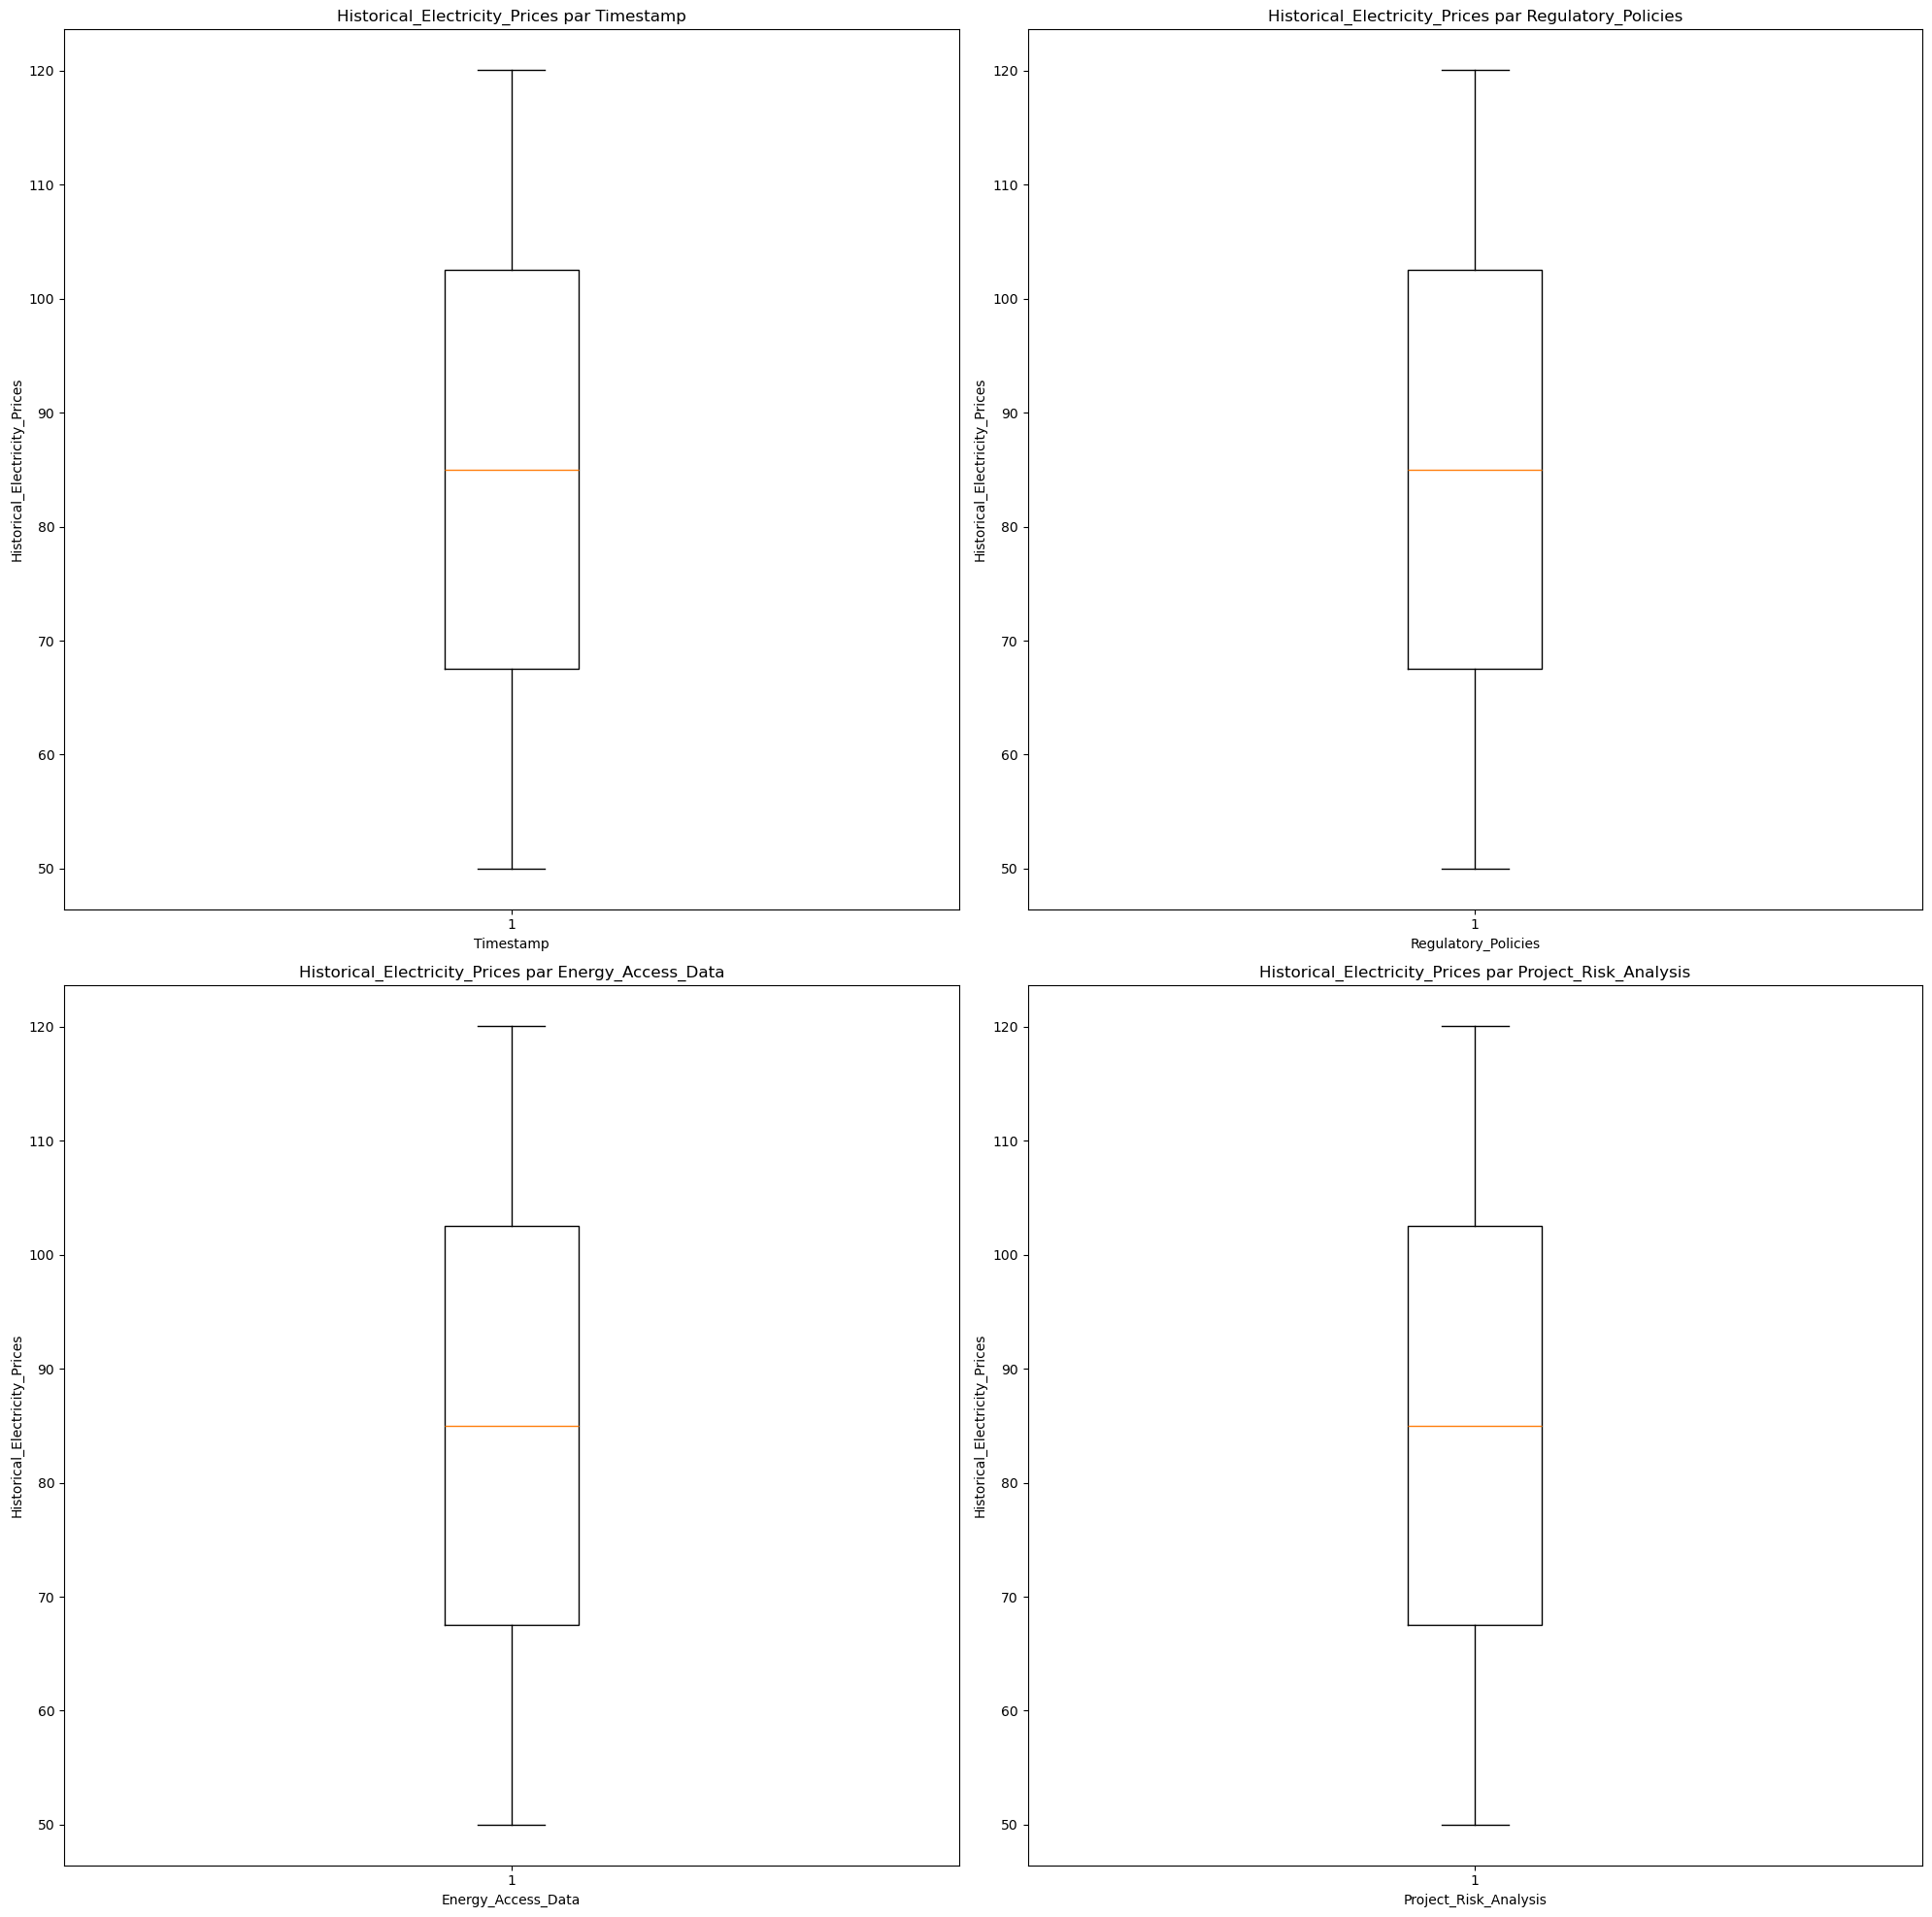

In [18]:
categorical_columns=[col for col in df_elec.columns if col not in numeric_column]
plt.figure(figsize=(20,20))

for i,col in enumerate(categorical_columns):
    plt.subplot(2,2,i+1)
    plt.boxplot(df_elec[target],label=col)
    plt.title(f"{target} par {col}")
    plt.suptitle("")
    plt.xlabel(col)
    plt.ylabel(target)
plt.tight_layout()
plt.show()


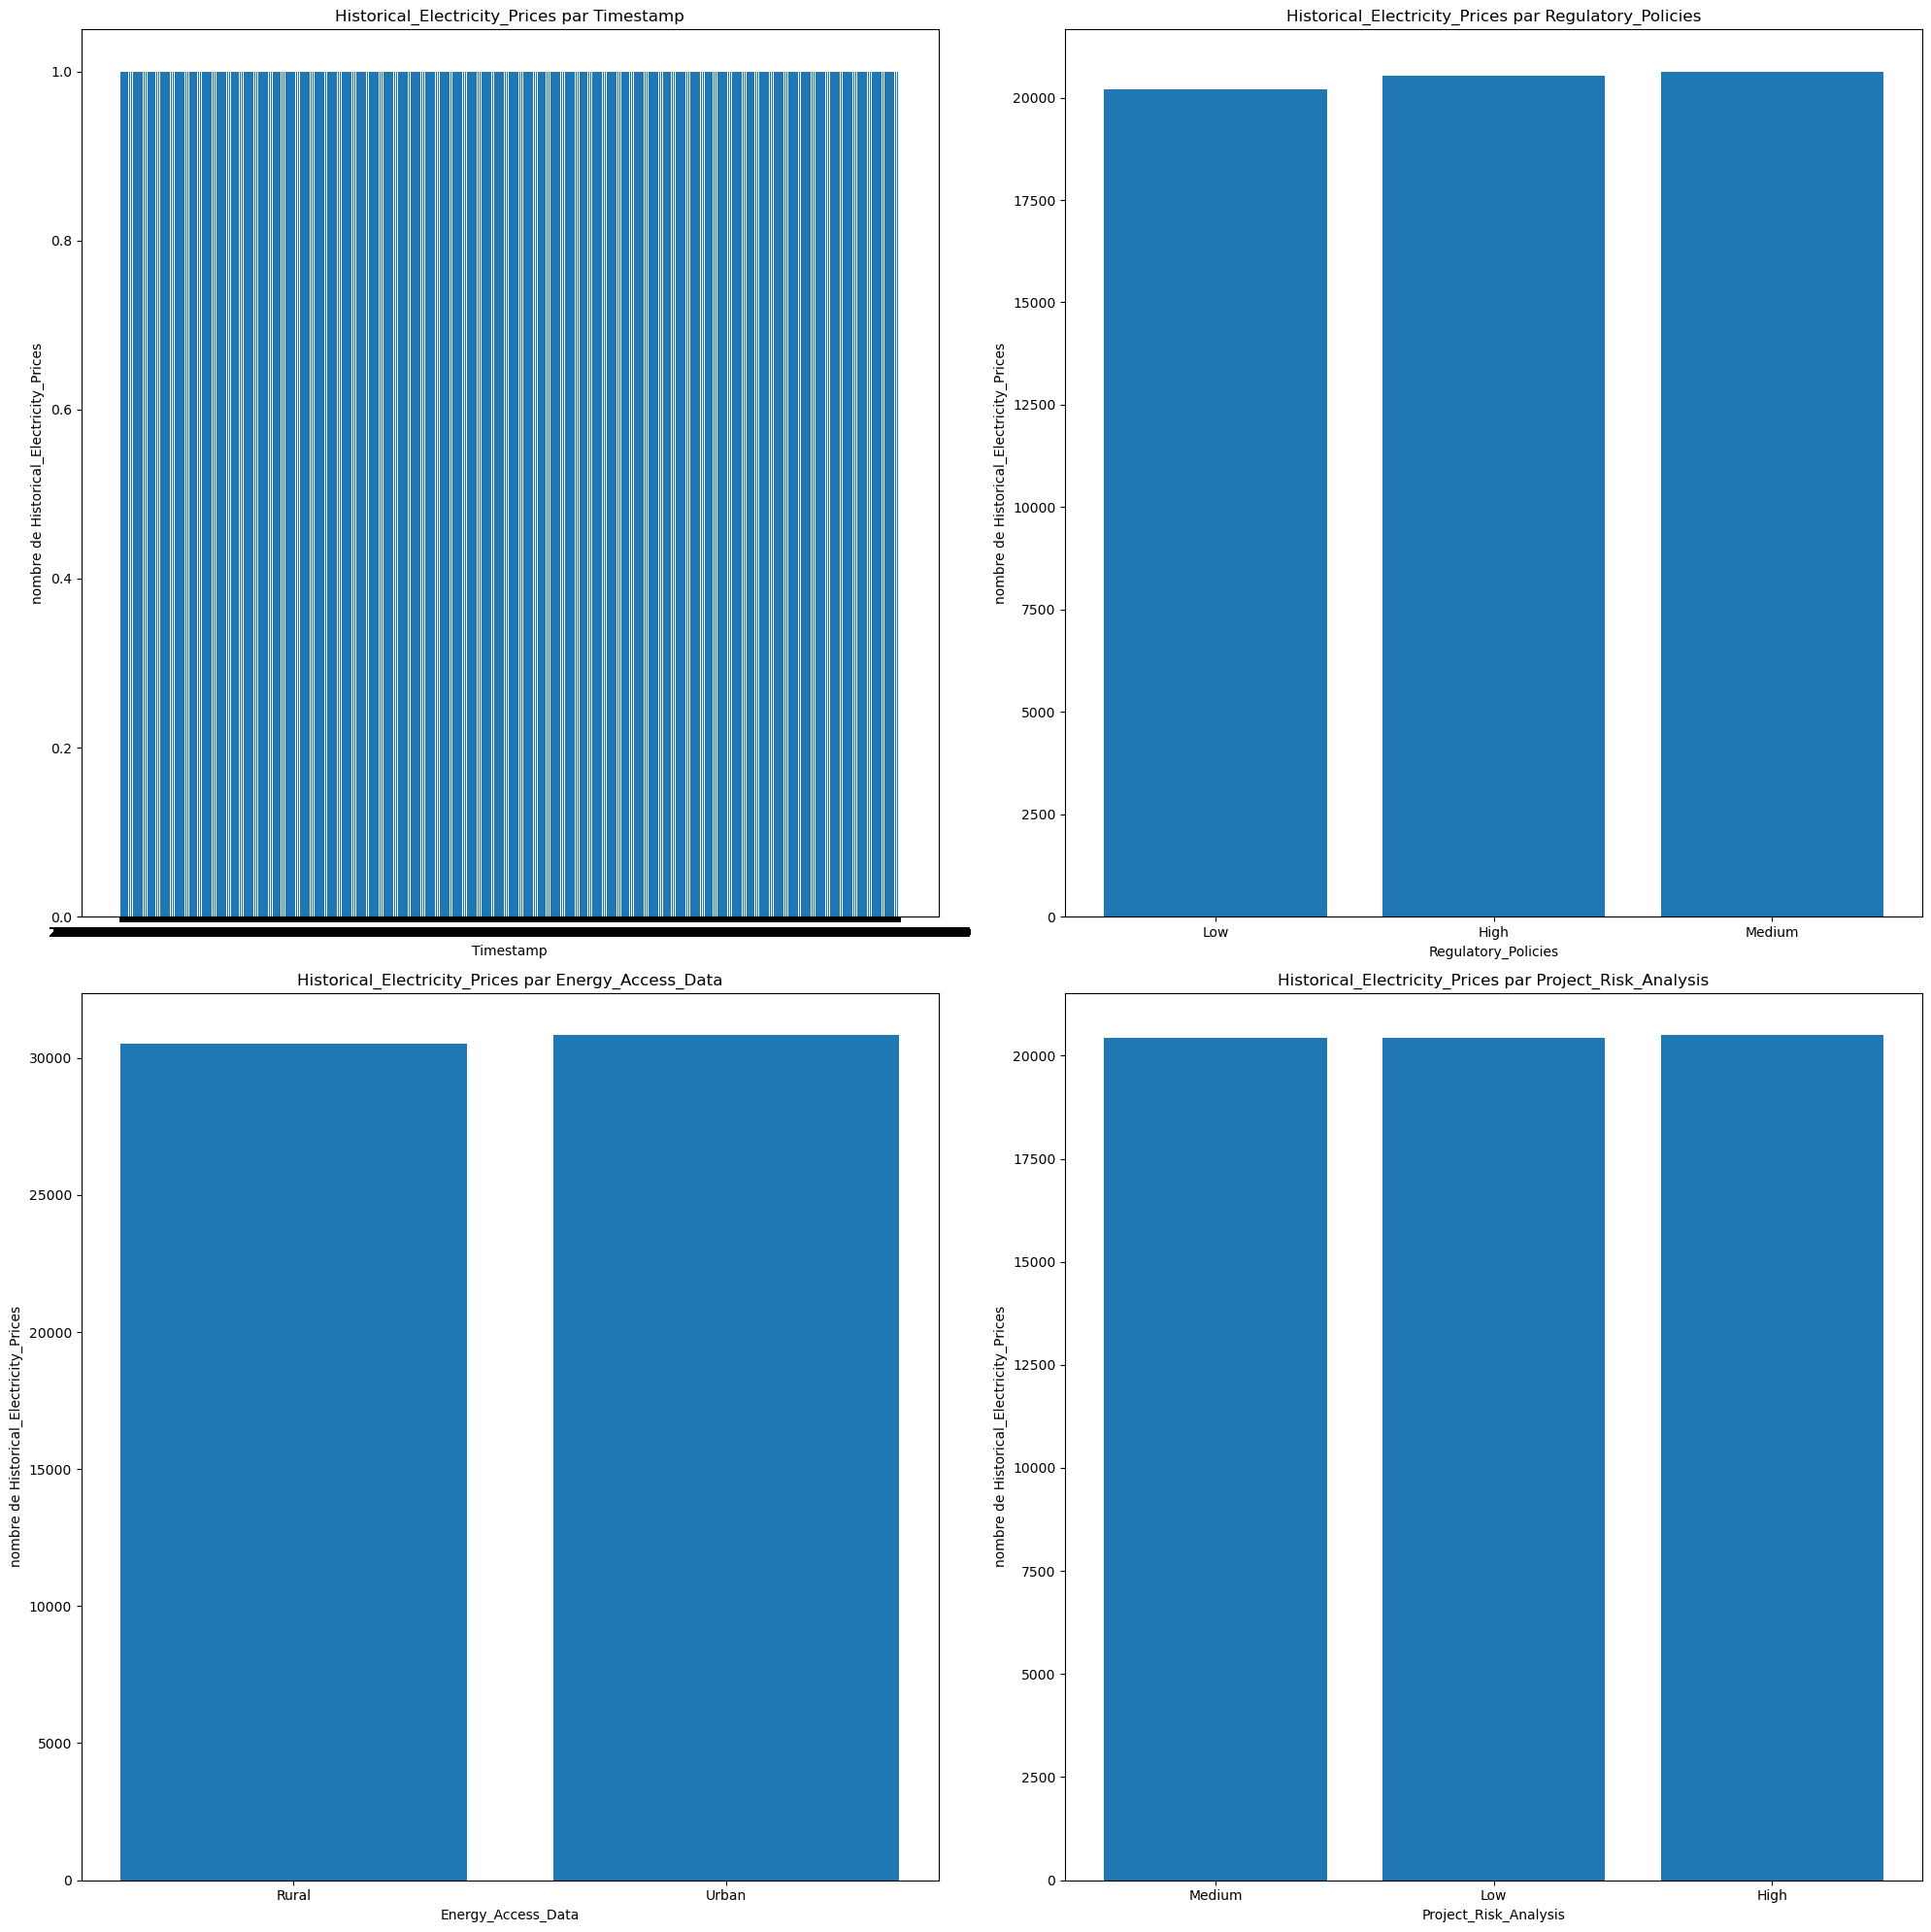

In [19]:
plt.figure(figsize=(20,20))

for i,col in enumerate(categorical_columns):
    grouped=df_elec.groupby(col)[target].count().sort_values()
    plt.subplot(2,2,i+1)
    plt.bar(grouped.index.astype(str),grouped.values)
    plt.title(f"{target} par {col}")
    plt.xlabel(col)
    plt.ylabel(f'nombre de {target}')
plt.tight_layout()
plt.show()


les données sont réparties équitablements entre toutes les catégories.

## Préparation des données

split de préparation du jeux de test qui ne sera pas modifié ni vue pour éviter le data leakage